In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Reading Data

In [71]:
df = pd.read_excel("MX Nizanda weather station data 2006-2024.xlsx",sheet_name='Base de datos')

In [72]:
df

,Segment,Source,Day,Month,Year,Hour,Minute,Barometer - mm Hg,Temp - °C,High Temp - °C,...,InHeat,InEMC,In AirDensity,WindSamp,WindTx,ISSRecept,Arc.Int.,SolarRad,SolarEnergy,HiSolarRad
0,1.0,Nizanda 1,5.0,2.0,2006.0,19.0,0.0,769.0,24.3,24.3,...,NaN,NaN,NaN,37.0,1.0,5.4,30.0,0.0,0.00,0.0
1,1.0,Nizanda 1,5.0,2.0,2006.0,20.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,1.0,0.0,30.0,NaN,NaN,NaN
2,1.0,Nizanda 1,6.0,2.0,2006.0,23.0,0.0,768.9,29.4,29.9,...,NaN,NaN,NaN,562.0,1.0,82.2,30.0,799.0,34.36,824.0
3,1.0,Nizanda 1,6.0,2.0,2006.0,23.0,30.0,768.5,30.4,30.9,...,NaN,NaN,NaN,683.0,1.0,99.9,30.0,853.0,36.68,874.0
4,1.0,Nizanda 1,7.0,2.0,2006.0,0.0,0.0,768.1,31.1,31.4,...,NaN,NaN,NaN,678.0,1.0,99.1,30.0,889.0,38.23,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,4.0,Vantage Connect,25.0,3.0,24.0,5.0,0.0,755.5,25.4,25.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67520,4.0,Vantage Connect,25.0,3.0,24.0,6.0,0.0,756.0,25.3,25.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67521,4.0,Vantage Connect,25.0,3.0,24.0,7.0,0.0,756.5,25.3,25.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67522,4.0,Vantage Connect,25.0,3.0,24.0,8.0,0.0,756.9,26.1,26.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.columns

Index(['Segment', 'Source', 'Day', 'Month', 'Year', 'Hour', 'Minute',
       'Barometer - mm Hg', 'Temp - °C', 'High Temp - °C', 'Low Temp - °C',
       'Hum - %', 'Dew Point - °C', 'Wet Bulb - °C', 'Wind Speed - m/s',
       'Wind Direction', 'Wind Run - m', 'High Wind Speed - m/s',
       'High Wind Direction', 'Wind Chill - °C', 'Heat Index - °C',
       'THW Index - °C', 'Rain - mm', 'Rain Rate - mm/h', 'ET - mm',
       'Heating Degree Days', 'Cooling Degree Days', 'InTemp', 'InHum',
       'In Dew', 'InHeat', 'InEMC', 'In AirDensity', 'WindSamp', 'WindTx ',
       'ISSRecept', 'Arc.Int.', 'SolarRad', 'SolarEnergy', 'HiSolarRad'],
      dtype='object')

| **Column**                         | **Meaning**                                                                     | **Notes for Temp Prediction**                                                                               |
| ---------------------------------- | ------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| **Segment**                        | Which recording system/version was used (2006–2019 local, 2020–2024 cloud).     | Not directly predictive; may be useful as categorical control if data recording changes affect values.      |
| **Source**                         | Data origin (station/logger).                                                   | Metadata, not needed.                                                                                       |
| **Day, Month, Year, Hour, Minute** | Timestamp of observation.                                                       | Absolutely needed for time-series structure. You may later extract features: seasonality, month, hour, etc. |
| **Barometer – mm Hg**              | Atmospheric pressure. Lower pressure often links with warmer, humid conditions. | Strong candidate.                                                                                           |
| **Temp – °C**                      | Air temperature at that time.                                                   | 🎯 Target variable (the one you want to predict).                                                           |
| **High Temp – °C**                 | Daily maximum temp.                                                             | Useful if you predict **future hourly/daily temp**, not if predicting the same instant.                     |
| **Low Temp – °C**                  | Daily minimum temp.                                                             | Same as above.                                                                                              |
| **Hum – %**                        | Relative humidity. Affects perceived temperature and dew point.                 | Useful predictor.                                                                                           |
| **Dew Point – °C**                 | Temperature at which air becomes saturated.                                     | Strongly correlated with temp, good predictor.                                                              |
| **Wet Bulb – °C**                  | Temp measured with evaporative cooling effect.                                  | Useful, but often redundant with humidity + temp.                                                           |
| **Wind Speed – m/s**               | Wind speed.                                                                     | Influences cooling; secondary predictor.                                                                    |
| **Wind Direction**                 | Compass angle (0–360°).                                                         | May be useful if winds from certain directions bring heat/coolness.                                         |
| **Wind Run – m**                   | Distance wind traveled in a period.                                             | Correlated with wind speed; may be redundant.                                                               |
| **High Wind Speed – m/s**          | Max wind speed observed.                                                        | Same as wind speed; might be useful for extremes.                                                           |
| **High Wind Direction**            | Direction of strongest wind.                                                    | Niche; may not add much predictive power.                                                                   |
| **Wind Chill – °C**                | Perceived temp when wind lowers it.                                             | Derived variable (depends on wind + temp); drop if predicting **actual** temp.                              |
| **Heat Index – °C**                | Perceived heat (temp + humidity).                                               | Also derived; may be redundant.                                                                             |
| **THW Index – °C**                 | Combines temp, humidity, wind.                                                  | Derived; not useful if predicting actual temp.                                                              |
| **Rain – mm**                      | Total rainfall.                                                                 | Can affect cooling. Good predictor for daily trends.                                                        |
| **Rain Rate – mm/h**               | Instant rainfall rate.                                                          | Can help for short-term temperature drops.                                                                  |
| **ET – mm**                        | Evapotranspiration (water loss from soil/plants).                               | Climatic insight; correlated with temp & humidity.                                                          |
| **Heating Degree Days**            | How much heating is needed (temp below baseline).                               | Derived from temp; not useful.                                                                              |
| **Cooling Degree Days**            | Cooling requirement (temp above baseline).                                      | Same, not useful.                                                                                           |
| **InTemp**                         | Indoor temperature (station shelter).                                           | Not relevant.                                                                                               |
| **InHum**                          | Indoor humidity.                                                                | Not relevant.                                                                                               |
| **In Dew**                         | Indoor dew point.                                                               | Not relevant.                                                                                               |
| **InHeat**                         | Indoor heat index.                                                              | Not relevant.                                                                                               |
| **InEMC**                          | Indoor equilib                                                                  |                                                                                                             |


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67524 entries, 0 to 67523
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Segment                67521 non-null  float64
 1   Source                 67521 non-null  object 
 2   Day                    67521 non-null  float64
 3   Month                  67521 non-null  float64
 4   Year                   67521 non-null  float64
 5   Hour                   67521 non-null  float64
 6   Minute                 67521 non-null  float64
 7   Barometer - mm Hg      67518 non-null  float64
 8   Temp - °C              67264 non-null  object 
 9   High Temp - °C         67264 non-null  object 
 10  Low Temp - °C          67264 non-null  object 
 11  Hum - %                67183 non-null  object 
 12  Dew Point - °C         67183 non-null  object 
 13  Wet Bulb - °C          23588 non-null  object 
 14  Wind Speed - m/s       67264 non-null  object 
 15  Wi

In [75]:
df.describe()

,Segment,Day,Month,Year,Hour,Minute,Barometer - mm Hg,High Wind Speed - m/s,Rain - mm,Rain Rate - mm/h,...,InHeat,InEMC,In AirDensity,WindSamp,WindTx,ISSRecept,Arc.Int.,SolarRad,SolarEnergy,HiSolarRad
count,67521.000000,67521.000000,67521.000000,67521.000000,67521.000000,67521.000000,67518.000000,67264.000000,67264.000000,67264.000000,...,20457.000000,20457.000000,20457.000000,43933.000000,43933.0,43933.000000,43933.000000,25770.000000,25770.000000,25724.000000
mean,2.616238,15.717895,6.382118,1918.423128,11.479362,4.616741,761.230587,7.796798,0.071777,0.535505,...,35.748443,10.689052,1.011703,1195.540072,1.0,98.827418,53.005395,240.632751,16.253114,297.969600
std,1.276867,8.721002,3.519786,427.173523,6.912044,10.827613,8.918646,4.029453,0.859235,11.732416,...,19.092015,3.146026,0.371967,642.183444,0.0,8.504575,28.422704,326.694587,29.540058,379.127876
min,1.000000,1.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.200000,1.320000,0.057800,0.000000,1.0,0.000000,9.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,3.000000,2006.000000,6.000000,0.000000,757.000000,5.400000,0.000000,0.000000,...,27.000000,8.650000,1.129300,682.000000,1.0,99.400000,30.000000,0.000000,0.000000,0.000000
50%,3.000000,16.000000,6.000000,2017.000000,12.000000,0.000000,759.800000,8.000000,0.000000,0.000000,...,29.600000,10.190000,1.139300,1367.000000,1.0,100.000000,60.000000,10.000000,0.520000,26.000000
75%,4.000000,23.000000,9.000000,2021.000000,18.000000,0.000000,766.300000,10.300000,0.000000,0.000000,...,32.400000,11.910000,1.151100,1401.000000,1.0,100.000000,60.000000,494.000000,24.730000,645.000000
max,4.000000,31.000000,12.000000,2023.000000,23.000000,56.000000,778.200000,47.900000,46.500000,2090.200000,...,107.200000,22.050000,16.840000,2810.000000,1.0,100.000000,120.000000,1161.000000,180.620000,1545.000000


In [76]:
df = df[['Day', 'Month', 'Year', 'Hour', 'Minute','Barometer - mm Hg','Temp - °C', 'High Temp - °C', 'Low Temp - °C',
       'Hum - %', 'Dew Point - °C', 'Wet Bulb - °C', 'Wind Speed - m/s','Wind Direction', 'Wind Run - m', 
       'High Wind Speed - m/s',
       'High Wind Direction', 'Wind Chill - °C', 'Heat Index - °C',
       'THW Index - °C', 'Rain - mm', 'Rain Rate - mm/h','SolarRad']]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67524 entries, 0 to 67523
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day                    67521 non-null  float64
 1   Month                  67521 non-null  float64
 2   Year                   67521 non-null  float64
 3   Hour                   67521 non-null  float64
 4   Minute                 67521 non-null  float64
 5   Barometer - mm Hg      67518 non-null  float64
 6   Temp - °C              67264 non-null  object 
 7   High Temp - °C         67264 non-null  object 
 8   Low Temp - °C          67264 non-null  object 
 9   Hum - %                67183 non-null  object 
 10  Dew Point - °C         67183 non-null  object 
 11  Wet Bulb - °C          23588 non-null  object 
 12  Wind Speed - m/s       67264 non-null  object 
 13  Wind Direction         65677 non-null  object 
 14  Wind Run - m           67264 non-null  object 
 15  Hi

#### Converting coulmns to numeric

In [78]:
cols_to_convert = [
    "Temp - °C", "High Temp - °C", "Low Temp - °C",
    "Hum - %", "Dew Point - °C", "Wet Bulb - °C",
    "Wind Speed - m/s", "Wind Run - m",
    "Wind Chill - °C", "Heat Index - °C", "THW Index - °C",'Heat Index - °C'
]

# Convert to numeric
for col in cols_to_convert:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(",", ".").str.strip(),
        errors="coerce"
    )

# Check results
print(df[cols_to_convert].dtypes)

C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\2726322648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(
C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\2726322648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(
C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\2726322648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Temp - °C           float64
High Temp - °C      float64
Low Temp - °C       float64
Hum - %             float64
Dew Point - °C      float64
Wet Bulb - °C       float64
Wind Speed - m/s    float64
Wind Run - m        float64
Wind Chill - °C     float64
Heat Index - °C     float64
THW Index - °C      float64
Heat Index - °C     float64
dtype: object


C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\2726322648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67524 entries, 0 to 67523
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day                    67521 non-null  float64
 1   Month                  67521 non-null  float64
 2   Year                   67521 non-null  float64
 3   Hour                   67521 non-null  float64
 4   Minute                 67521 non-null  float64
 5   Barometer - mm Hg      67518 non-null  float64
 6   Temp - °C              67212 non-null  float64
 7   High Temp - °C         67219 non-null  float64
 8   Low Temp - °C          67219 non-null  float64
 9   Hum - %                67130 non-null  float64
 10  Dew Point - °C         67130 non-null  float64
 11  Wet Bulb - °C          23536 non-null  float64
 12  Wind Speed - m/s       67219 non-null  float64
 13  Wind Direction         65677 non-null  object 
 14  Wind Run - m           67219 non-null  float64
 15  Hi

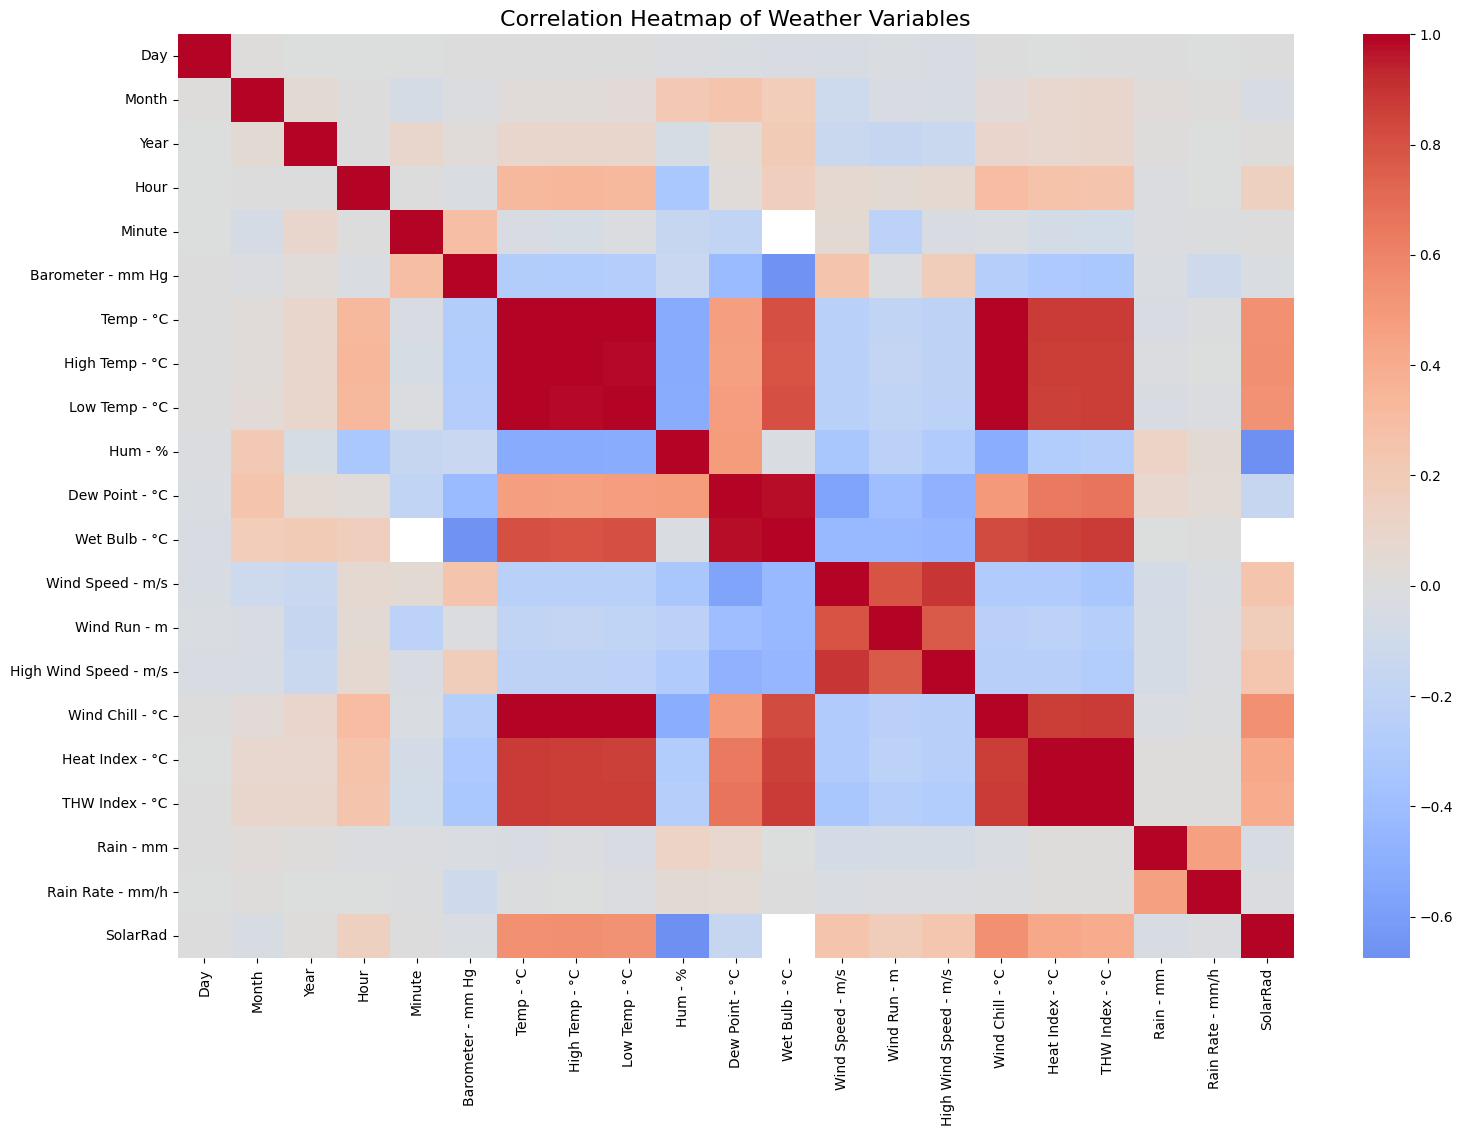

In [80]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(18,12))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap of Weather Variables", fontsize=16)
plt.show()

In [81]:
# Correlation matrix
corr = numeric_df.corr()

# Focus only on correlation with temperature
temp_corr = corr["Temp - °C"].sort_values(ascending=False)

temp_corr


Temp - °C                1.000000
Wind Chill - °C          0.996164
High Temp - °C           0.993290
Low Temp - °C            0.992014
THW Index - °C           0.874171
Heat Index - °C          0.869322
Wet Bulb - °C            0.805952
SolarRad                 0.543491
Dew Point - °C           0.475459
Hour                     0.323146
Year                     0.091820
Month                    0.029852
Day                      0.003554
Rain Rate - mm/h        -0.011173
Rain - mm               -0.029422
Minute                  -0.034042
Wind Run - m            -0.187703
High Wind Speed - m/s   -0.215400
Wind Speed - m/s        -0.248417
Barometer - mm Hg       -0.274009
Hum - %                 -0.527505
Name: Temp - °C, dtype: float64

In [82]:
df = df[['Barometer - mm Hg', 'Hum - %', 'Dew Point - °C', 'SolarRad', 'Wind Speed - m/s', 
         'High Wind Speed - m/s', 'Wind Run - m', 'Rain - mm', 'Rain Rate - mm/h', 'Wind Direction','Heat Index - °C',
         'Hour', 'Month', 'Year','Day','Temp - °C']]

In [83]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,SolarRad,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C
0,769.0,49.0,12.9,0.0,0.0,0.0,0.00,0.0,0.0,NaN,24.2,19.0,2.0,2006.0,5.0,24.3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2.0,2006.0,5.0,NaN
2,768.9,37.0,13.2,799.0,1.3,4.5,0.70,0.0,0.0,E,29.2,23.0,2.0,2006.0,6.0,29.4
3,768.5,33.0,12.3,853.0,1.8,4.9,0.90,0.0,0.0,ESE,29.7,23.0,2.0,2006.0,6.0,30.4
4,768.1,33.0,12.9,889.0,1.3,5.8,0.70,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,NaN,1.8,6.7,1.79,0.0,0.0,S,27.5,5.0,3.0,24.0,25.0,25.4
67520,756.0,86.0,22.8,NaN,2.2,7.6,2.24,0.0,0.0,ENE,27.4,6.0,3.0,24.0,25.0,25.3
67521,756.5,86.0,22.8,NaN,1.8,6.7,1.79,0.0,0.0,NE,27.4,7.0,3.0,24.0,25.0,25.3
67522,756.9,82.0,22.8,NaN,2.7,7.6,2.68,0.0,0.0,S,28.6,8.0,3.0,24.0,25.0,26.1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67524 entries, 0 to 67523
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Barometer - mm Hg      67518 non-null  float64
 1   Hum - %                67130 non-null  float64
 2   Dew Point - °C         67130 non-null  float64
 3   SolarRad               25770 non-null  float64
 4   Wind Speed - m/s       67219 non-null  float64
 5   High Wind Speed - m/s  67264 non-null  float64
 6   Wind Run - m           67219 non-null  float64
 7   Rain - mm              67264 non-null  float64
 8   Rain Rate - mm/h       67264 non-null  float64
 9   Wind Direction         65677 non-null  object 
 10  Heat Index - °C        67211 non-null  float64
 11  Hour                   67521 non-null  float64
 12  Month                  67521 non-null  float64
 13  Year                   67521 non-null  float64
 14  Day                    67521 non-null  float64
 15  Te

In [85]:
df.isna().sum()

Barometer - mm Hg            6
Hum - %                    394
Dew Point - °C             394
SolarRad                 41754
Wind Speed - m/s           305
High Wind Speed - m/s      260
Wind Run - m               305
Rain - mm                  260
Rain Rate - mm/h           260
Wind Direction            1847
Heat Index - °C            313
Hour                         3
Month                        3
Year                         3
Day                          3
Temp - °C                  312
dtype: int64

In [86]:
df.dropna(subset=['Barometer - mm Hg', 'Hour', 'Month', 'Year'], inplace=True)

In [87]:
df.drop(columns='SolarRad', inplace=True)

In [88]:
df.isna().sum()

Barometer - mm Hg           0
Hum - %                   388
Dew Point - °C            388
Wind Speed - m/s          299
High Wind Speed - m/s     254
Wind Run - m              299
Rain - mm                 254
Rain Rate - mm/h          254
Wind Direction           1841
Heat Index - °C           307
Hour                        0
Month                       0
Year                        0
Day                         0
Temp - °C                 306
dtype: int64

#### Percentage of Missing Values 

In [89]:
missing = df[['Hum - %','Dew Point - °C','Wind Speed - m/s',
              'High Wind Speed - m/s','Wind Run - m','Rain - mm','Rain Rate - mm/h']].isna().sum()

percent_missing = (missing / len(df)) * 100
percent_missing


Hum - %                  0.574662
Dew Point - °C           0.574662
Wind Speed - m/s         0.442845
High Wind Speed - m/s    0.376196
Wind Run - m             0.442845
Rain - mm                0.376196
Rain Rate - mm/h         0.376196
dtype: float64

#### Filling Missing Values 

In [90]:
# Interpolation for continuous climate variables
df['Hum - %'] = df['Hum - %'].interpolate(method='linear')
df['Dew Point - °C'] = df['Dew Point - °C'].interpolate(method='linear')
df['Temp - °C'] = df['Temp - °C'].interpolate(method='linear')
df['Wind Speed - m/s'] = df['Wind Speed - m/s'].interpolate(method='linear')
df['Heat Index - °C'] = df['Heat Index - °C'].interpolate(method='linear')

# Forward fill for cumulative / max values
df['High Wind Speed - m/s'] = df['High Wind Speed - m/s'].fillna(method='ffill')
df['Wind Run - m'] = df['Wind Run - m'].fillna(method='ffill')

# Fill rain with 0
df['Rain - mm'] = df['Rain - mm'].fillna(0)
df['Rain Rate - mm/h'] = df['Rain Rate - mm/h'].fillna(0)


C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\1829117533.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['High Wind Speed - m/s'] = df['High Wind Speed - m/s'].fillna(method='ffill')
C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\1829117533.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Wind Run - m'] = df['Wind Run - m'].fillna(method='ffill')


In [91]:
df.to_csv("cleaned_weather.csv", index=False)

In [92]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C
0,769.0,49.0,12.9,0.0,0.0,0.00,0.0,0.0,NaN,24.2,19.0,2.0,2006.0,5.0,24.3
2,768.9,37.0,13.2,1.3,4.5,0.70,0.0,0.0,E,29.2,23.0,2.0,2006.0,6.0,29.4
3,768.5,33.0,12.3,1.8,4.9,0.90,0.0,0.0,ESE,29.7,23.0,2.0,2006.0,6.0,30.4
4,768.1,33.0,12.9,1.3,5.8,0.70,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.1
5,767.6,30.0,11.7,1.8,6.3,0.90,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,1.8,6.7,1.79,0.0,0.0,S,27.5,5.0,3.0,24.0,25.0,25.4
67520,756.0,86.0,22.8,2.2,7.6,2.24,0.0,0.0,ENE,27.4,6.0,3.0,24.0,25.0,25.3
67521,756.5,86.0,22.8,1.8,6.7,1.79,0.0,0.0,NE,27.4,7.0,3.0,24.0,25.0,25.3
67522,756.9,82.0,22.8,2.7,7.6,2.68,0.0,0.0,S,28.6,8.0,3.0,24.0,25.0,26.1


In [93]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C
0,769.0,49.0,12.9,0.0,0.0,0.00,0.0,0.0,NaN,24.2,19.0,2.0,2006.0,5.0,24.3
2,768.9,37.0,13.2,1.3,4.5,0.70,0.0,0.0,E,29.2,23.0,2.0,2006.0,6.0,29.4
3,768.5,33.0,12.3,1.8,4.9,0.90,0.0,0.0,ESE,29.7,23.0,2.0,2006.0,6.0,30.4
4,768.1,33.0,12.9,1.3,5.8,0.70,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.1
5,767.6,30.0,11.7,1.8,6.3,0.90,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,1.8,6.7,1.79,0.0,0.0,S,27.5,5.0,3.0,24.0,25.0,25.4
67520,756.0,86.0,22.8,2.2,7.6,2.24,0.0,0.0,ENE,27.4,6.0,3.0,24.0,25.0,25.3
67521,756.5,86.0,22.8,1.8,6.7,1.79,0.0,0.0,NE,27.4,7.0,3.0,24.0,25.0,25.3
67522,756.9,82.0,22.8,2.7,7.6,2.68,0.0,0.0,S,28.6,8.0,3.0,24.0,25.0,26.1


#### 4. Monthly average temperature

C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\4018576091.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Month", y="Temp - °C", estimator="mean", ci=None)


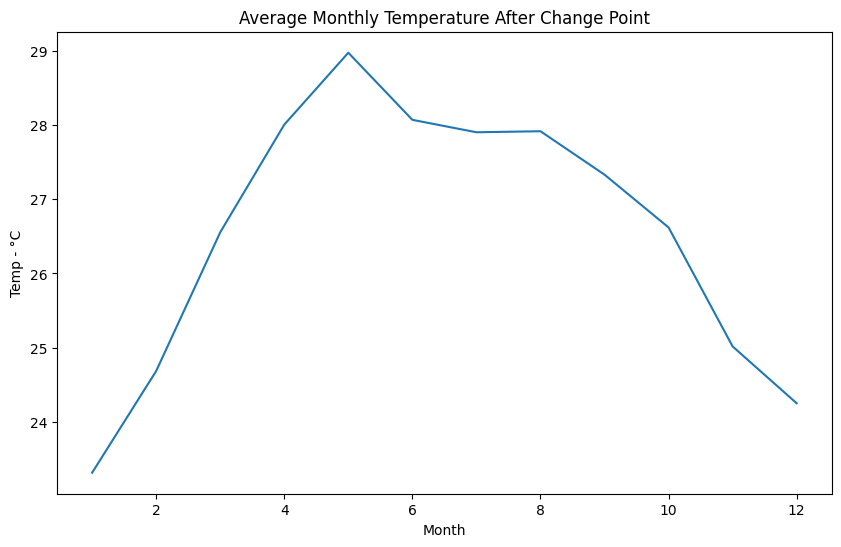

In [94]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Month", y="Temp - °C", estimator="mean", ci=None)
plt.title("Average Monthly Temperature After Change Point")
plt.show()

#### 5. Yearly average rainfall

C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\256839606.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Year", y="Rain - mm", estimator="mean", ci=None)


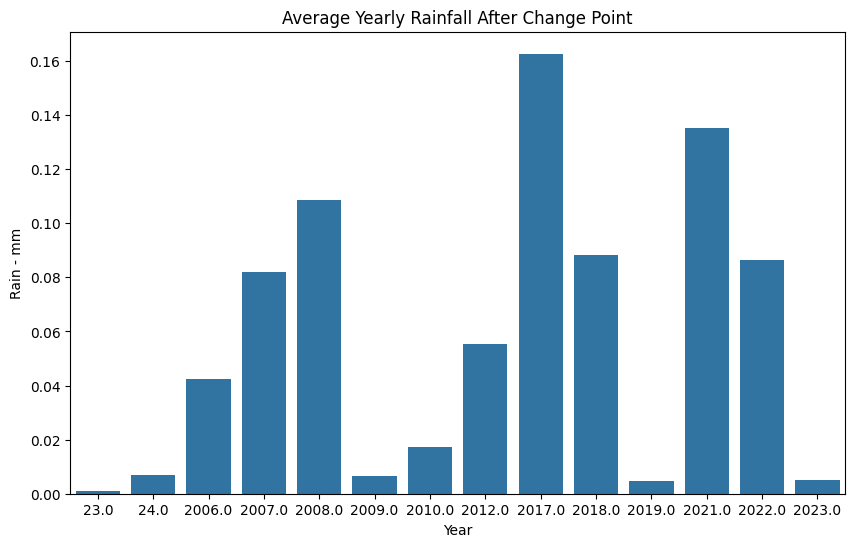

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Year", y="Rain - mm", estimator="mean", ci=None)
plt.title("Average Yearly Rainfall After Change Point")
plt.show()

In [96]:
df.columns

Index(['Barometer - mm Hg', 'Hum - %', 'Dew Point - °C', 'Wind Speed - m/s',
       'High Wind Speed - m/s', 'Wind Run - m', 'Rain - mm',
       'Rain Rate - mm/h', 'Wind Direction', 'Heat Index - °C', 'Hour',
       'Month', 'Year', 'Day', 'Temp - °C'],
      dtype='object')

| **Feature**         | **Unit** | **Meaning**                                                                                                                     |
| ------------------- | -------- | ------------------------------------------------------------------------------------------------------------------------------- |
| **Barometer**       | mm Hg    | Atmospheric pressure measured at the station; lower values often indicate storms or rain, higher values indicate clear weather. |
| **Hum**             | %        | Relative humidity — how much moisture is in the air compared to the maximum it could hold at that temperature.                  |
| **Dew Point**       | °C       | The temperature at which air becomes saturated (100% humidity) and dew forms. Higher values mean more moisture in the air.      |
| **Wind Speed**      | m/s      | Average wind speed over the measurement period.                                                                                 |
| **High Wind Speed** | m/s      | Maximum wind speed (gusts) recorded in the measurement period.                                                                  |
| **Wind Run**        | m        | Total distance the wind has traveled over the measurement period (integrates speed over time).                                  |
| **Rain**            | mm       | Total rainfall collected during the measurement period.                                                                         |
| **Rain Rate**       | mm/h     | Intensity of rainfall (how fast rain is falling).                                                                               |
| **Hour**            | –        | Hour of the day (0–23). Helps in studying daily patterns.                                                                       |
| **Month**           | –        | Month of the year (1–12). Helps capture seasonal effects.                                                                       |
| **Year**            | –        | Year of observation. Useful for long-term trend analysis.                                                                       |
| **Day**             | –        | Day of the month (1–31).                                                                                                        |
| **Temp**            | °C       | Air temperature at the station.                                                                                                 |


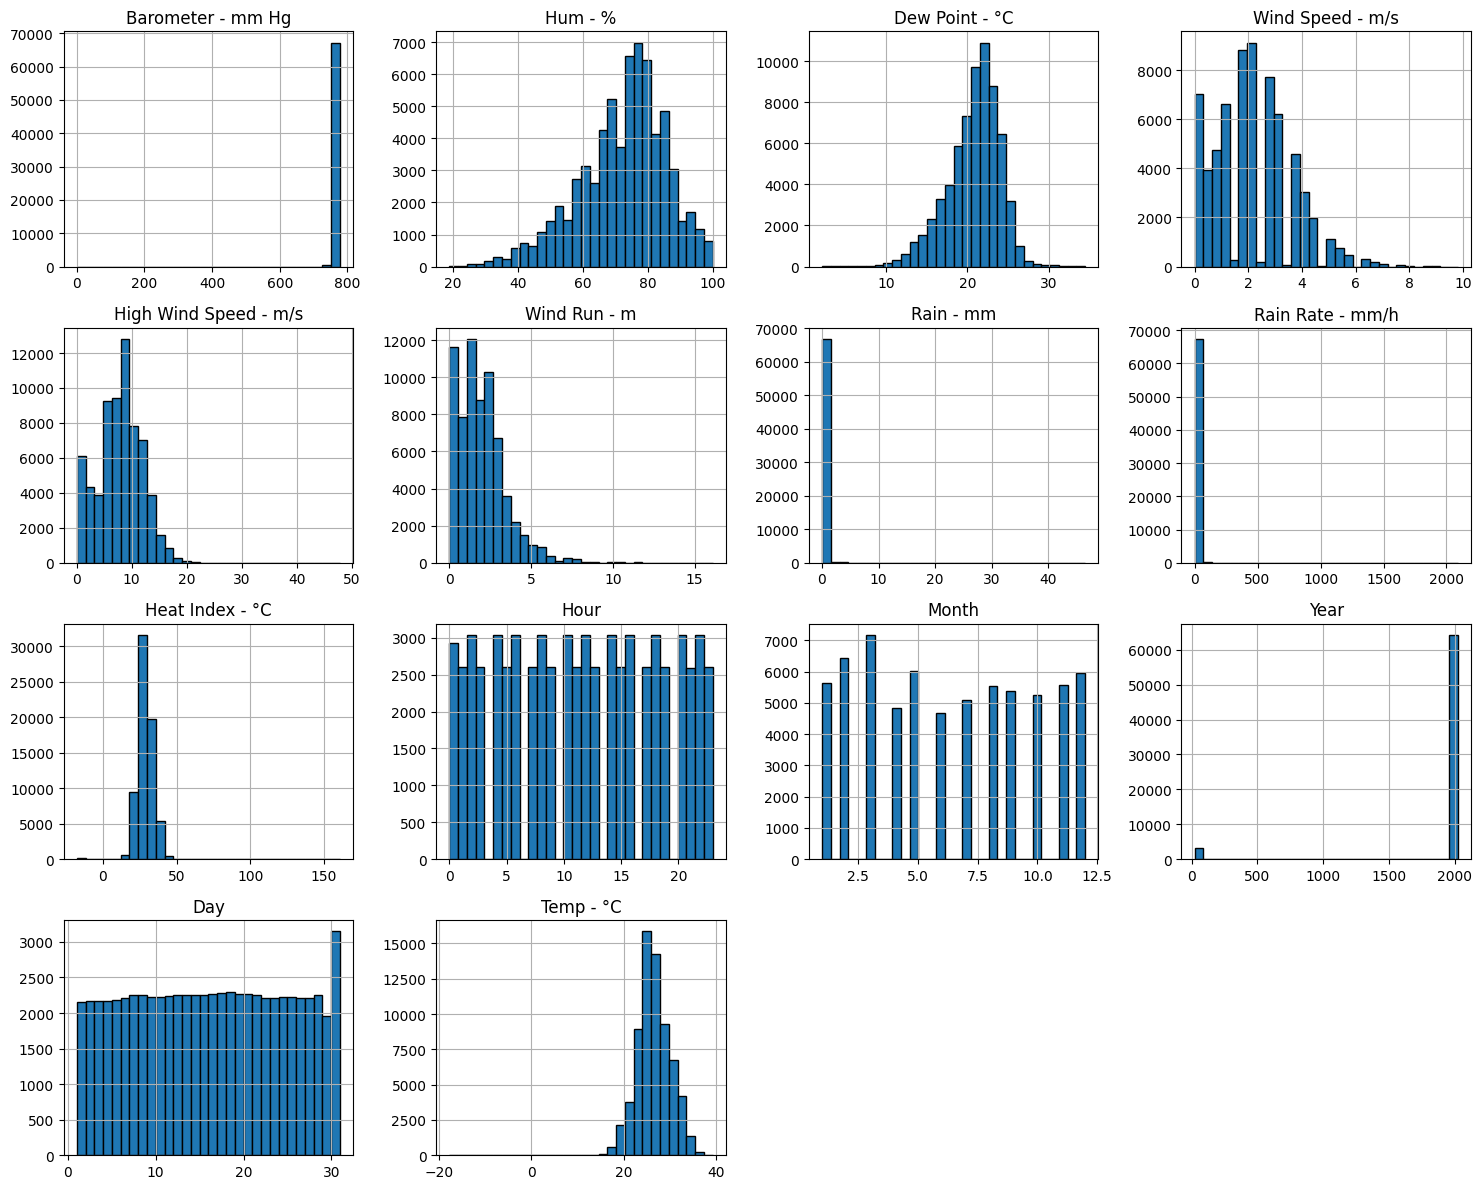

In [97]:
df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

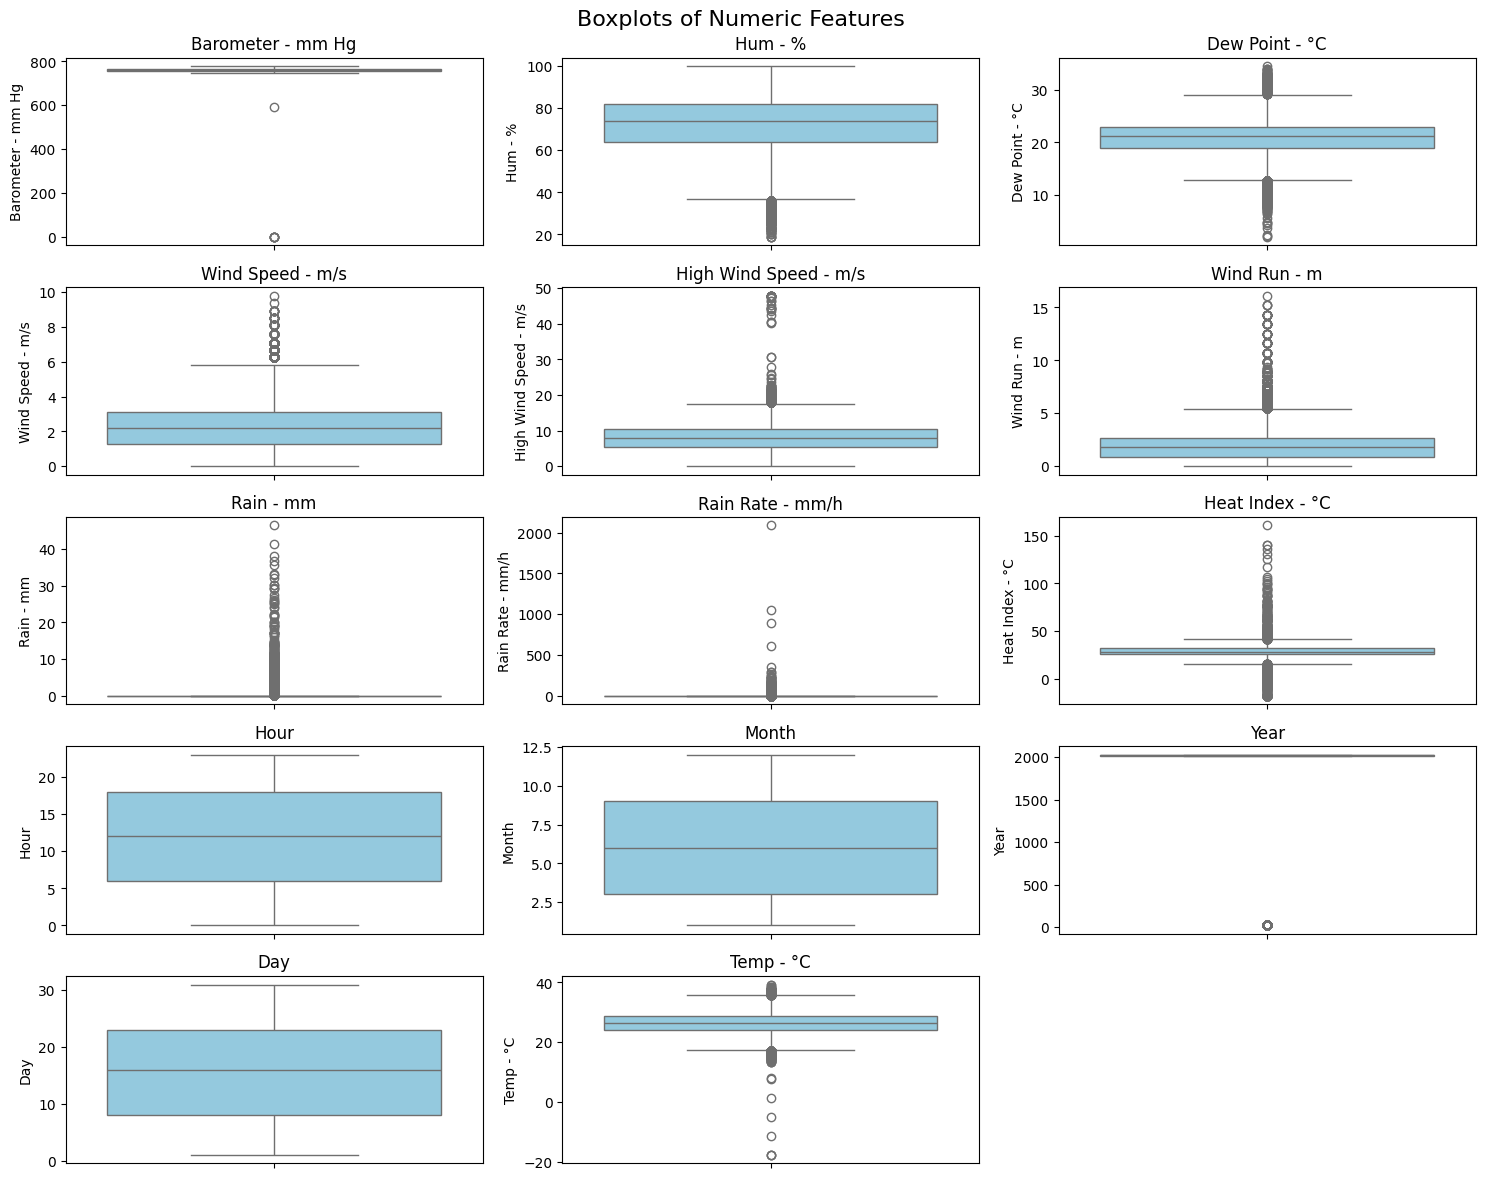

In [98]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.suptitle("Boxplots of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [99]:
invalid_conditions = {
    "Hum - %": (df["Hum - %"] < 0) | (df["Hum - %"] > 100),
    "Rain - mm": (df["Rain - mm"] < 0),
    "Rain Rate - mm/h": (df["Rain Rate - mm/h"] < 0),
    "Temp - °C": (df["Temp - °C"] < 10) | (df["Temp - °C"] > 60),   # extreme Earth range
    "Dew Point - °C": (df["Dew Point - °C"] < -80) | (df["Dew Point - °C"] > 40),
    "Wind Speed - m/s": (df["Wind Speed - m/s"] < 0) | (df["Wind Speed - m/s"] > 100),
    "High Wind Speed - m/s": (df["High Wind Speed - m/s"] < 0) | (df["High Wind Speed - m/s"] > 120),
    "Barometer - mm Hg": (df["Barometer - mm Hg"] < 400) | (df["Barometer - mm Hg"] > 800)  # sea-level range
}

In [100]:
for col, condition in invalid_conditions.items():
    invalid_count = condition.sum()
    if invalid_count > 0:
        print(f"{col}: {invalid_count} invalid values detected")
    else:
        print(f"{col}: all values physically valid")

invalid_rows = pd.DataFrame()
for col, condition in invalid_conditions.items():
    invalid_rows = pd.concat([invalid_rows, df[condition]])

invalid_rows = invalid_rows.drop_duplicates()
print("\nSample of rows with impossible values:")
invalid_rows

Hum - %: all values physically valid
Rain - mm: all values physically valid
Rain Rate - mm/h: all values physically valid
Temp - °C: 8 invalid values detected
Dew Point - °C: all values physically valid
Wind Speed - m/s: all values physically valid
High Wind Speed - m/s: all values physically valid
Barometer - mm Hg: 6 invalid values detected

Sample of rows with impossible values:


,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C
24071,762.1,77.625000,16.0125,4.000000,9.1,7.32,0.00,0.0,NaN,-17.800000,2.0,1.0,2010.0,6.0,7.800000
24072,761.4,74.500000,15.5500,4.150000,9.1,7.32,0.00,0.0,NaN,-17.800000,4.0,1.0,2010.0,6.0,1.400000
24073,761.9,71.375000,15.0875,4.300000,9.1,7.32,0.00,0.0,NaN,-17.800000,6.0,1.0,2010.0,6.0,-5.000000
24074,762.7,68.250000,14.6250,4.450000,9.1,7.32,0.00,0.0,NaN,-17.800000,8.0,1.0,2010.0,6.0,-11.400000
24075,762.8,65.125000,14.1625,4.600000,4.9,9.14,0.00,0.0,W,-17.800000,10.0,1.0,2010.0,6.0,-17.800000
24320,757.4,62.000000,20.5000,1.200000,1.5,2.44,0.00,0.0,NW,-17.800000,2.0,1.0,2010.0,29.0,-17.800000
24321,0.0,50.500000,19.3000,1.350000,1.5,2.44,0.00,0.0,NaN,8.900000,7.0,2.0,2010.0,1.0,8.050000
25021,591.0,53.500000,15.0000,0.000000,0.0,0.00,0.00,0.0,NaN,-17.800000,4.0,4.0,2010.0,26.0,-17.800000
24276,0.0,65.000000,19.5250,1.300000,2.4,0.61,0.00,0.0,NaN,12.333333,11.0,1.0,2010.0,25.0,26.866667
24536,0.0,64.000000,20.5500,2.250000,44.5,3.66,0.00,0.0,NaN,30.100000,5.0,3.0,2010.0,2.0,28.000000


In [101]:
df = df.drop(index=invalid_rows.index)

In [102]:
import numpy as np
import pymannkendall as mk

def pettitt_test(series):
    n = len(series)
    rank = np.argsort(series) + 1
    U = np.zeros(n)
    
    for t in range(n):
        U[t] = 2 * np.sum(rank[:t+1]) - (t+1) * (n+1)
    
    K = np.max(np.abs(U))
    tau = np.argmax(np.abs(U))
    
    p_value = 2 * np.exp((-6 * K**2) / (n**3 + n**2))
    
    return tau, p_value

tau, p = pettitt_test(df["Temp - °C"].values)
print("Change point at index:", tau)
print("p-value:", p)


Change point at index: 32670
p-value: 2.1377970672863834e-08


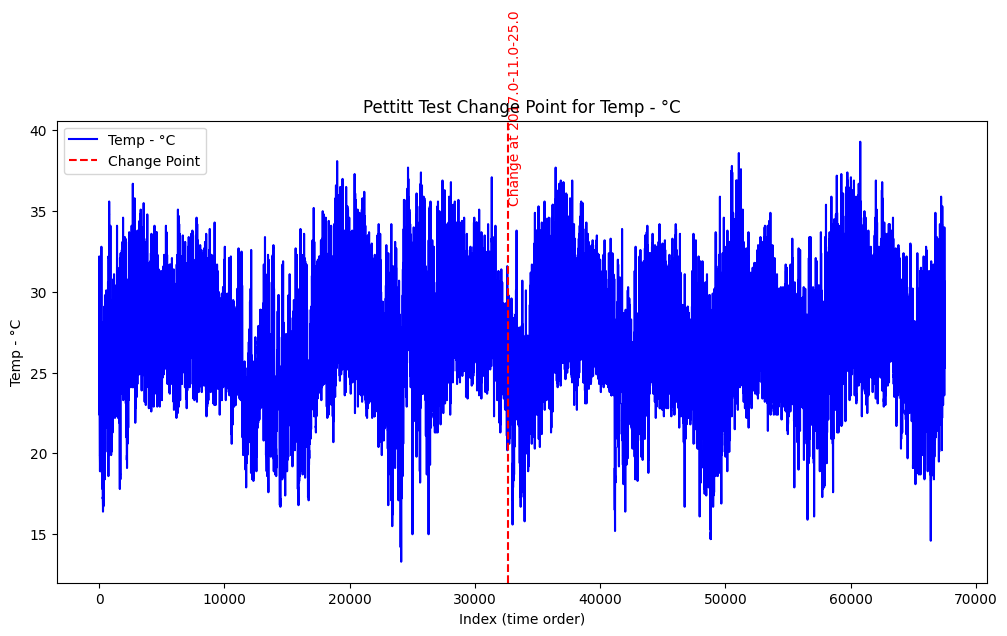

In [103]:
import matplotlib.pyplot as plt

# Choose the variable you tested (example: Rain - mm)
col = "Temp - °C"

# Pettitt test result
change_point = tau  # from your result

# Plot
plt.figure(figsize=(12,6))
plt.plot(df[col].values, label=col, color="blue")

# Mark the change point
plt.axvline(change_point, color="red", linestyle="--", label="Change Point")

# Annotate with date
change_date = df.iloc[change_point][["Year","Month","Day"]]
plt.text(change_point, df[col].max()*0.9,
         f"Change at {change_date['Year']}-{change_date['Month']}-{change_date['Day']}",
         color="red", rotation=90, va="bottom")

plt.title(f"Pettitt Test Change Point for {col}")
plt.xlabel("Index (time order)")
plt.ylabel(col)
plt.legend()
plt.show()


In [104]:
df.iloc[tau]

Barometer - mm Hg         757.0
Hum - %                    73.0
Dew Point - °C             16.4
Wind Speed - m/s            4.0
High Wind Speed - m/s       9.8
Wind Run - m                4.0
Rain - mm                   0.0
Rain Rate - mm/h            0.0
Wind Direction                N
Heat Index - °C            21.7
Hour                        6.0
Month                      11.0
Year                     2017.0
Day                        25.0
Temp - °C                  21.4
Name: 32688, dtype: object

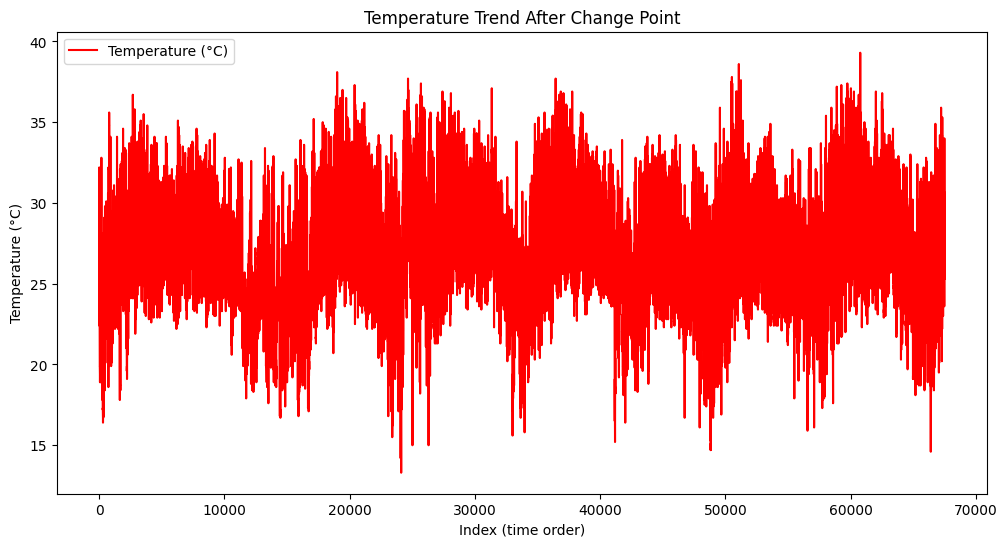

In [105]:
plt.figure(figsize=(12,6))
plt.plot(df["Temp - °C"].values, label="Temperature (°C)", color="red")
plt.xlabel("Index (time order)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend After Change Point")
plt.legend()
plt.show()

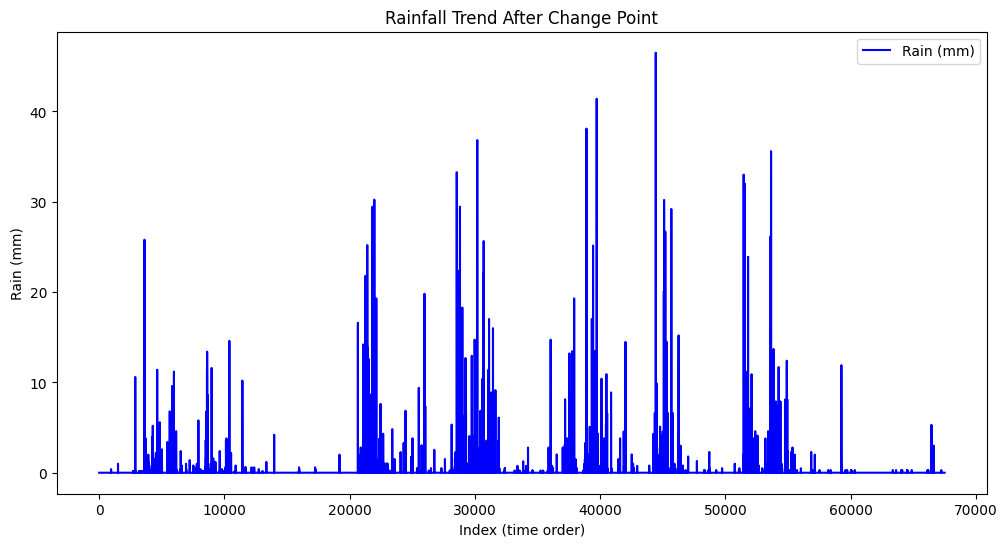

In [106]:
plt.figure(figsize=(12,6))
plt.plot(df["Rain - mm"].values, label="Rain (mm)", color="blue")
plt.xlabel("Index (time order)")
plt.ylabel("Rain (mm)")
plt.title("Rainfall Trend After Change Point")
plt.legend()
plt.show()

In [107]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df['Season'] = df['Month'].apply(get_season)


In [108]:
df['Day_Night'] = df['Hour'].apply(lambda h: 'Day' if 6 <= h <= 18 else 'Night')

In [109]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C,Season,Day_Night
0,769.0,49.0,12.9,0.0,0.0,0.00,0.0,0.0,NaN,24.2,19.0,2.0,2006.0,5.0,24.3,Winter,Night
2,768.9,37.0,13.2,1.3,4.5,0.70,0.0,0.0,E,29.2,23.0,2.0,2006.0,6.0,29.4,Winter,Night
3,768.5,33.0,12.3,1.8,4.9,0.90,0.0,0.0,ESE,29.7,23.0,2.0,2006.0,6.0,30.4,Winter,Night
4,768.1,33.0,12.9,1.3,5.8,0.70,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.1,Winter,Night
5,767.6,30.0,11.7,1.8,6.3,0.90,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.4,Winter,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,1.8,6.7,1.79,0.0,0.0,S,27.5,5.0,3.0,24.0,25.0,25.4,Spring,Night
67520,756.0,86.0,22.8,2.2,7.6,2.24,0.0,0.0,ENE,27.4,6.0,3.0,24.0,25.0,25.3,Spring,Day
67521,756.5,86.0,22.8,1.8,6.7,1.79,0.0,0.0,NE,27.4,7.0,3.0,24.0,25.0,25.3,Spring,Day
67522,756.9,82.0,22.8,2.7,7.6,2.68,0.0,0.0,S,28.6,8.0,3.0,24.0,25.0,26.1,Spring,Day


In [110]:
season_map = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}
df['Season'] = df['Season'].map(season_map)

In [111]:
daynight_map = {"Day": 1, "Night": 0}
df['Day_Night'] = df['Day_Night'].map(daynight_map)

In [112]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C,Season,Day_Night
0,769.0,49.0,12.9,0.0,0.0,0.00,0.0,0.0,NaN,24.2,19.0,2.0,2006.0,5.0,24.3,0,0
2,768.9,37.0,13.2,1.3,4.5,0.70,0.0,0.0,E,29.2,23.0,2.0,2006.0,6.0,29.4,0,0
3,768.5,33.0,12.3,1.8,4.9,0.90,0.0,0.0,ESE,29.7,23.0,2.0,2006.0,6.0,30.4,0,0
4,768.1,33.0,12.9,1.3,5.8,0.70,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.1,0,0
5,767.6,30.0,11.7,1.8,6.3,0.90,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,1.8,6.7,1.79,0.0,0.0,S,27.5,5.0,3.0,24.0,25.0,25.4,1,0
67520,756.0,86.0,22.8,2.2,7.6,2.24,0.0,0.0,ENE,27.4,6.0,3.0,24.0,25.0,25.3,1,1
67521,756.5,86.0,22.8,1.8,6.7,1.79,0.0,0.0,NE,27.4,7.0,3.0,24.0,25.0,25.3,1,1
67522,756.9,82.0,22.8,2.7,7.6,2.68,0.0,0.0,S,28.6,8.0,3.0,24.0,25.0,26.1,1,1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67505 entries, 0 to 67523
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Barometer - mm Hg      67505 non-null  float64
 1   Hum - %                67505 non-null  float64
 2   Dew Point - °C         67505 non-null  float64
 3   Wind Speed - m/s       67505 non-null  float64
 4   High Wind Speed - m/s  67505 non-null  float64
 5   Wind Run - m           67505 non-null  float64
 6   Rain - mm              67505 non-null  float64
 7   Rain Rate - mm/h       67505 non-null  float64
 8   Wind Direction         65674 non-null  object 
 9   Heat Index - °C        67505 non-null  float64
 10  Hour                   67505 non-null  float64
 11  Month                  67505 non-null  float64
 12  Year                   67505 non-null  float64
 13  Day                    67505 non-null  float64
 14  Temp - °C              67505 non-null  float64
 15  Season 

In [114]:
df['Wind Direction'].value_counts()

Wind Direction
NW     12355
N      11300
NE      8405
WNW     6452
ENE     4316
ESE     3492
NNE     3365
S       3045
E       2664
SE      2379
---     1549
NNW     1434
W       1293
SSE     1151
SSW     1080
SW       877
WSW      472
--        45
Name: count, dtype: int64

In [115]:
df = df[~df['Wind Direction'].isin(['---', '--'])]

In [116]:
direction_map = {
    "N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5,
    "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5,
    "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5,
    "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5
}

df['Wind_Dir_Deg'] = df['Wind Direction'].map(direction_map)


C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\1258434865.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind_Dir_Deg'] = df['Wind Direction'].map(direction_map)


In [117]:
df['Wind Direction'].value_counts()

Wind Direction
NW     12355
N      11300
NE      8405
WNW     6452
ENE     4316
ESE     3492
NNE     3365
S       3045
E       2664
SE      2379
NNW     1434
W       1293
SSE     1151
SSW     1080
SW       877
WSW      472
Name: count, dtype: int64

In [118]:
import numpy as np

# Convert degrees to radians
df['Wind_Dir_Rad'] = np.deg2rad(df['Wind_Dir_Deg'])

# Encode circular
df['Wind_Dir_sin'] = np.sin(df['Wind_Dir_Rad'])
df['Wind_Dir_cos'] = np.cos(df['Wind_Dir_Rad'])

# Drop the original columns
df.drop(columns=['Wind Direction', 'Wind_Dir_Deg', 'Wind_Dir_Rad'], inplace=True)


C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\245356565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind_Dir_Rad'] = np.deg2rad(df['Wind_Dir_Deg'])
C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\245356565.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind_Dir_sin'] = np.sin(df['Wind_Dir_Rad'])
C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\245356565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [119]:
df["Wind_Dir_sin"] = df["Wind_Dir_sin"].interpolate()
df["Wind_Dir_cos"] = df["Wind_Dir_cos"].interpolate()

C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\815610805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wind_Dir_sin"] = df["Wind_Dir_sin"].interpolate()
C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\815610805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wind_Dir_cos"] = df["Wind_Dir_cos"].interpolate()


In [120]:
import numpy as np

df["Wind_Direction"] = np.degrees(np.arctan2(df["Wind_Dir_sin"], df["Wind_Dir_cos"]))
df["Wind_Direction"] = (df["Wind_Direction"] + 360) % 36 

C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\3820666134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wind_Direction"] = np.degrees(np.arctan2(df["Wind_Dir_sin"], df["Wind_Dir_cos"]))
C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\3820666134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wind_Direction"] = (df["Wind_Direction"] + 360) % 36


In [121]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Heat Index - °C,Hour,Month,Year,Day,Temp - °C,Season,Day_Night,Wind_Dir_sin,Wind_Dir_cos,Wind_Direction
0,769.0,49.0,12.9,0.0,0.0,0.00,0.0,0.0,24.2,19.0,2.0,2006.0,5.0,24.3,0,0,NaN,NaN,NaN
2,768.9,37.0,13.2,1.3,4.5,0.70,0.0,0.0,29.2,23.0,2.0,2006.0,6.0,29.4,0,0,1.000000e+00,6.123234e-17,18.0
3,768.5,33.0,12.3,1.8,4.9,0.90,0.0,0.0,29.7,23.0,2.0,2006.0,6.0,30.4,0,0,9.238795e-01,-3.826834e-01,4.5
4,768.1,33.0,12.9,1.3,5.8,0.70,0.0,0.0,30.2,0.0,2.0,2006.0,7.0,31.1,0,0,1.000000e+00,6.123234e-17,18.0
5,767.6,30.0,11.7,1.8,6.3,0.90,0.0,0.0,30.2,0.0,2.0,2006.0,7.0,31.4,0,0,1.000000e+00,6.123234e-17,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,1.8,6.7,1.79,0.0,0.0,27.5,5.0,3.0,24.0,25.0,25.4,1,0,1.224647e-16,-1.000000e+00,0.0
67520,756.0,86.0,22.8,2.2,7.6,2.24,0.0,0.0,27.4,6.0,3.0,24.0,25.0,25.3,1,1,9.238795e-01,3.826834e-01,31.5
67521,756.5,86.0,22.8,1.8,6.7,1.79,0.0,0.0,27.4,7.0,3.0,24.0,25.0,25.3,1,1,7.071068e-01,7.071068e-01,9.0
67522,756.9,82.0,22.8,2.7,7.6,2.68,0.0,0.0,28.6,8.0,3.0,24.0,25.0,26.1,1,1,1.224647e-16,-1.000000e+00,0.0


In [122]:
df['Wind_Dir_cos'].value_counts()

Wind_Dir_cos
 0.707107    12431
 1.000000    11306
 0.707107     8419
 0.382683     6482
 0.382683     4351
             ...  
-0.954328        1
-0.969552        1
-0.984776        1
 0.450333        1
 0.517982        1
Name: count, Length: 845, dtype: int64

In [123]:
df['Wind_Dir_sin'].value_counts()

Wind_Dir_sin
-0.707107    12433
 0.000000    11315
 0.707107    10856
 0.923880     8022
-0.923880     6482
             ...  
 0.153073        1
 0.267878        1
 0.306147        1
 0.344415        1
-0.095671        1
Name: count, Length: 760, dtype: int64

In [124]:
df.columns

Index(['Barometer - mm Hg', 'Hum - %', 'Dew Point - °C', 'Wind Speed - m/s',
       'High Wind Speed - m/s', 'Wind Run - m', 'Rain - mm',
       'Rain Rate - mm/h', 'Heat Index - °C', 'Hour', 'Month', 'Year', 'Day',
       'Temp - °C', 'Season', 'Day_Night', 'Wind_Dir_sin', 'Wind_Dir_cos',
       'Wind_Direction'],
      dtype='object')

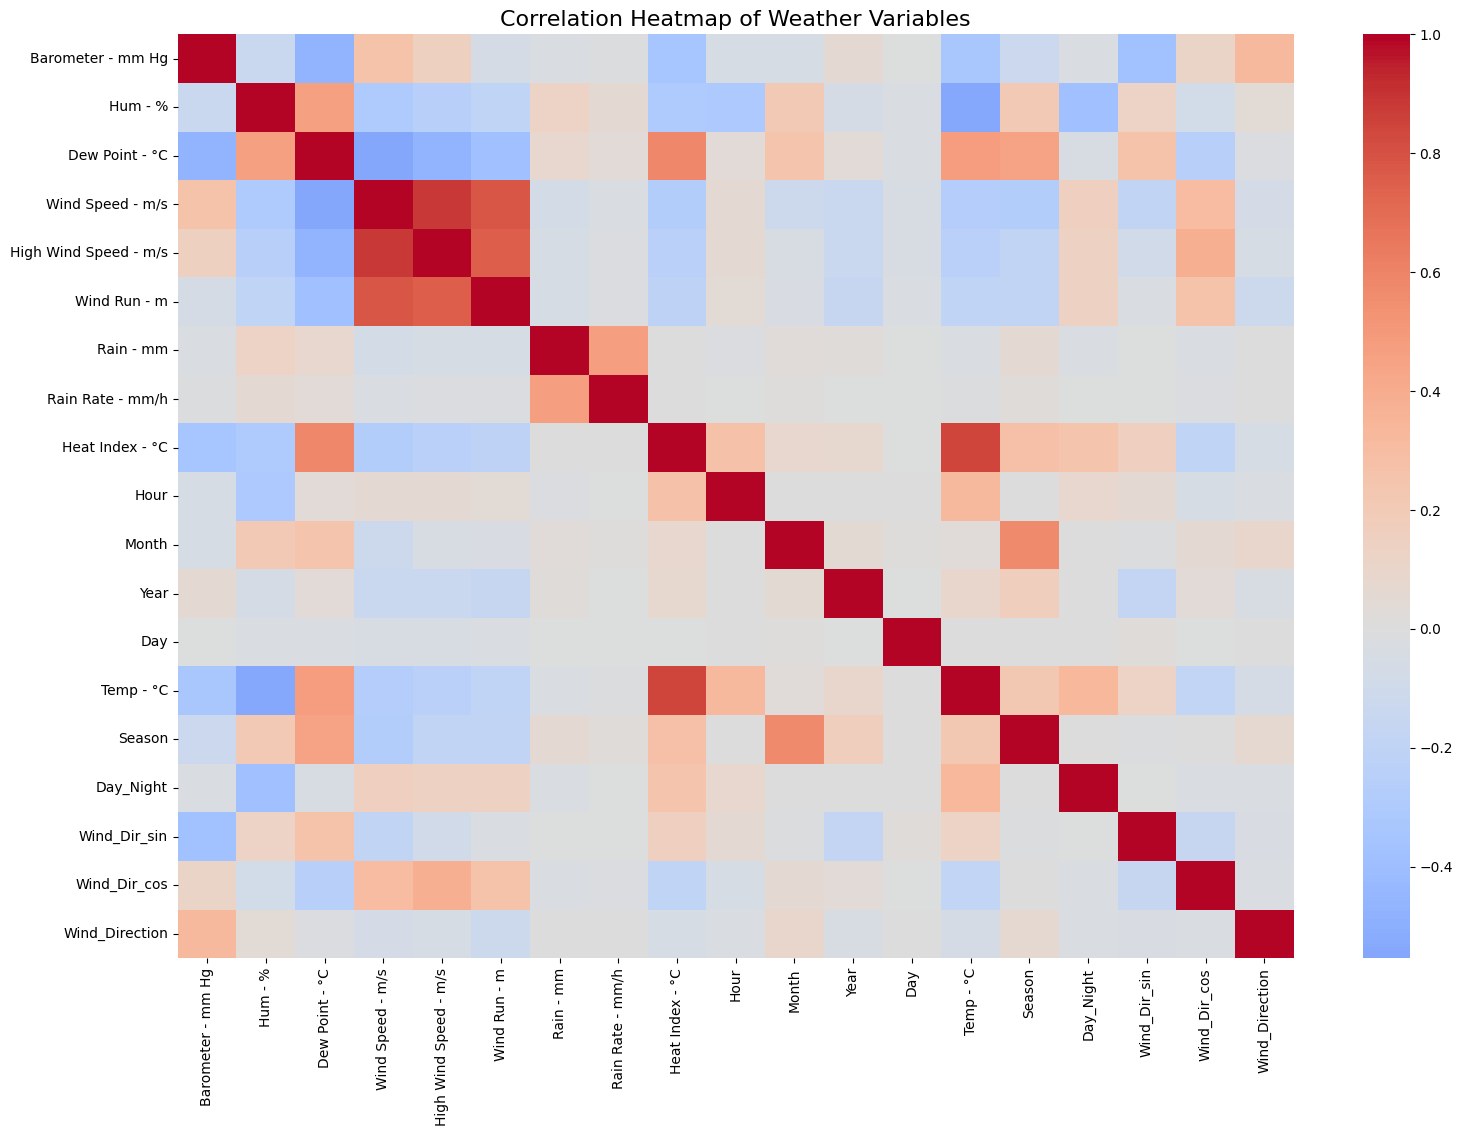

In [125]:
corr = df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap of Weather Variables", fontsize=16)
plt.show()

In [126]:
# Select data from the change point onwards
change_point = tau
df_model_after_Pettit = df.iloc[change_point:].reset_index(drop=True)

In [127]:
df_model_before_Pettit = df.drop(columns=['High Wind Speed - m/s', 'Wind Run - m', 'Hour','Month','Year','Day','Rain Rate - mm/h','Dew Point - °C'])
df_model_after_Pettit = df.iloc[change_point:].drop(
    columns=['High Wind Speed - m/s', 'Wind Run - m', 'Hour','Month','Year','Day','Rain Rate - mm/h','Dew Point - °C']
).reset_index(drop=True)

In [128]:
df.shape

(65911, 19)

In [129]:
df_model_before_Pettit.shape

(65911, 11)

In [130]:
df_model_after_Pettit.shape

(33241, 11)

In [131]:
df_model_before_Pettit.columns

Index(['Barometer - mm Hg', 'Hum - %', 'Wind Speed - m/s', 'Rain - mm',
       'Heat Index - °C', 'Temp - °C', 'Season', 'Day_Night', 'Wind_Dir_sin',
       'Wind_Dir_cos', 'Wind_Direction'],
      dtype='object')

In [132]:
df_model_after_Pettit.columns

Index(['Barometer - mm Hg', 'Hum - %', 'Wind Speed - m/s', 'Rain - mm',
       'Heat Index - °C', 'Temp - °C', 'Season', 'Day_Night', 'Wind_Dir_sin',
       'Wind_Dir_cos', 'Wind_Direction'],
      dtype='object')

## Feature Description Table

| Feature              | Type        | Description                                                                 |
|-----------------------|------------|-----------------------------------------------------------------------------|
| **Barometer - mm Hg** | Numerical  | Atmospheric pressure measured in millimeters of mercury (mmHg).             |
| **Hum - %**           | Numerical  | Relative humidity, representing moisture content in the air (%).             |
| **Dew Point - °C**    | Numerical  | Temperature at which air becomes saturated, causing condensation (°C).       |
| **Wind Speed - m/s**  | Numerical  | Average wind speed recorded in meters per second (m/s).                      |
| **Rain - mm**         | Numerical  | Total precipitation (rainfall) recorded in millimeters (mm).                 |
| **Rain Rate - mm/h**  | Numerical  | Intensity of rainfall, measured as millimeters per hour (mm/h).              |
| **Temp - °C**         | Target     | Air temperature (dependent variable to predict).                             |
| **Season**            | Categorical| Derived feature indicating the season (Winter, Spring, Summer, Autumn).      |
| **Day_Night**         | Categorical| Derived feature indicating day vs. night based on hour.                      |
| **Wind_Dir_sin**      | Numerical  | Sine transformation of wind direction (cyclical encoding).                   |
| **Wind_Dir_cos**      | Numerical  | Cosine transformation of wind direction (cyclical encoding).                 |
---------------------------------------------------------------------------------------------------------------------

Before Pettit
                     count        mean        std    min           25%  \
Barometer - mm Hg  65911.0  761.445903   5.227748  744.9  7.572000e+02   
Hum - %            65911.0   71.855775  13.134750   19.0  6.400000e+01   
Wind Speed - m/s   65911.0    2.223606   1.393770    0.0  1.300000e+00   
Rain - mm          65911.0    0.069515   0.856692    0.0  0.000000e+00   
Heat Index - °C    65911.0   28.681735   5.652973  -17.8  2.540000e+01   
Temp - °C          65911.0   26.494591   3.544844   13.3  2.420000e+01   
Season             65911.0    1.433994   1.123321    0.0  0.000000e+00   
Day_Night          65911.0    0.551213   0.497374    0.0  0.000000e+00   
Wind_Dir_sin       65910.0    0.022662   0.678969   -1.0 -7.071068e-01   
Wind_Dir_cos       65910.0    0.387750   0.617502   -1.0  6.123234e-17   
Wind_Direction     65910.0   13.887849  11.349332    0.0  4.500000e+00   

                          50%         75%         max       skew        kurt  
Barometer - mm Hg 

                         mean        std    min         max       skew  \
Barometer - mm Hg  761.445903   5.227748  744.9  778.200000   0.392497   
Hum - %             71.855775  13.134750   19.0  100.000000  -0.628623   
Wind Speed - m/s     2.223606   1.393770    0.0    9.800000   0.553877   
Rain - mm            0.069515   0.856692    0.0   46.500000  24.724598   
Heat Index - °C     28.681735   5.652973  -17.8  161.000000   0.472337   
Temp - °C           26.494591   3.544844   13.3   39.300000   0.077087   
Season               1.433994   1.123321    0.0    3.000000   0.101808   
Day_Night            0.551213   0.497374    0.0    1.000000  -0.205940   
Wind_Dir_sin         0.022662   0.678969   -1.0    1.000000  -0.026142   
Wind_Dir_cos         0.387750   0.617502   -1.0    1.000000  -1.048687   
Wind_Direction      13.887849  11.349332    0.0   35.944089   0.174538   

                         kurt  
Barometer - mm Hg   -0.955622  
Hum - %              0.273937  
Wind Speed - m/

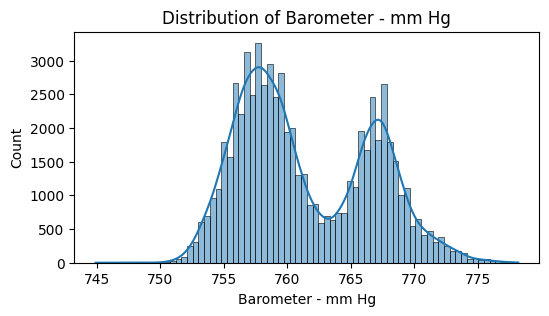

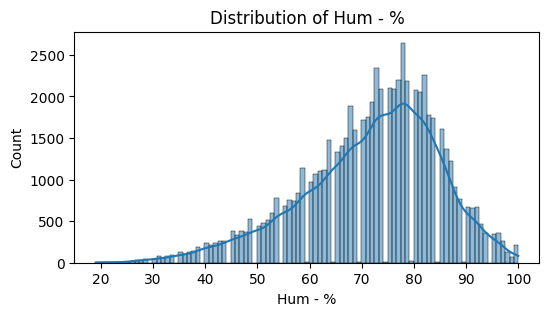

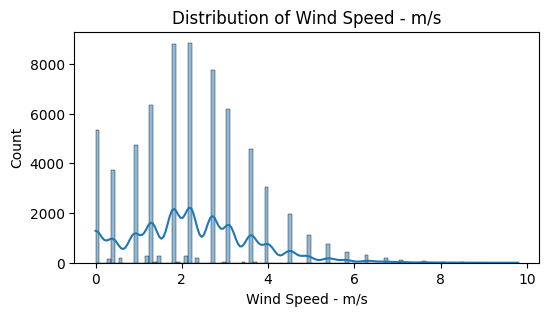

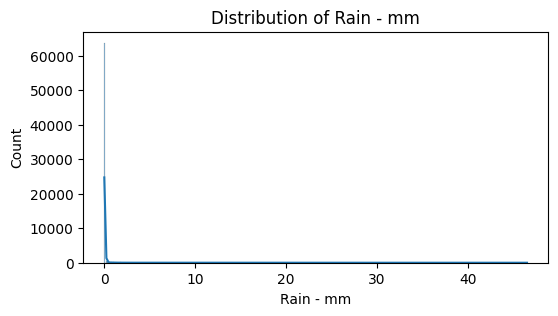

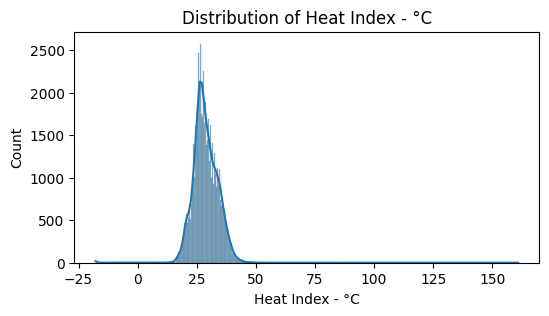

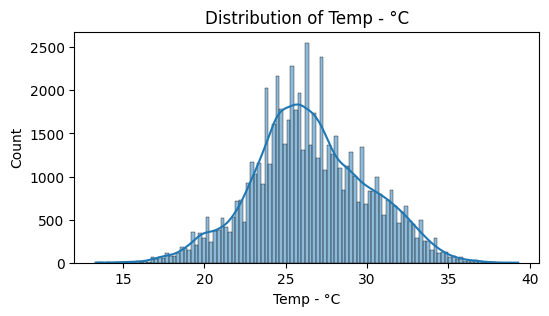

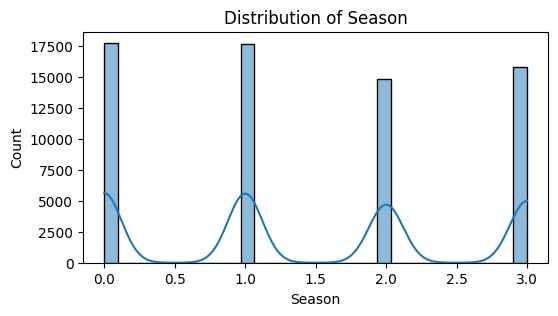

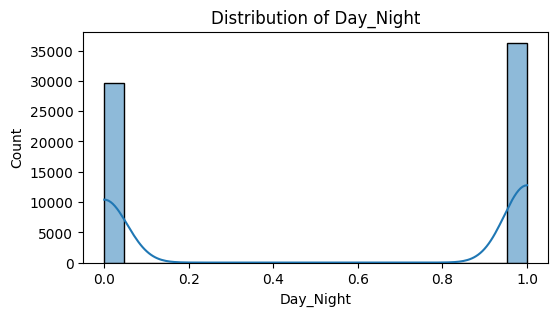

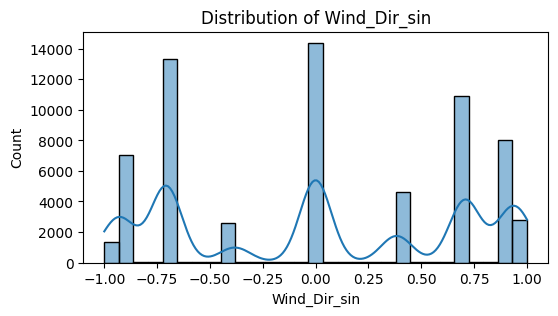

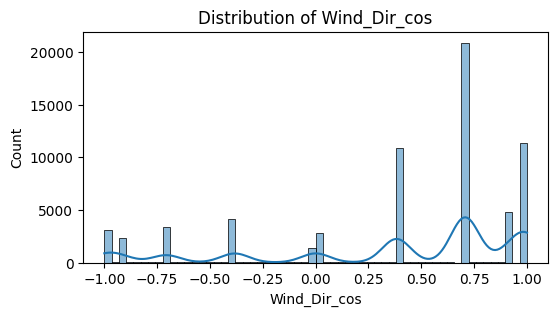

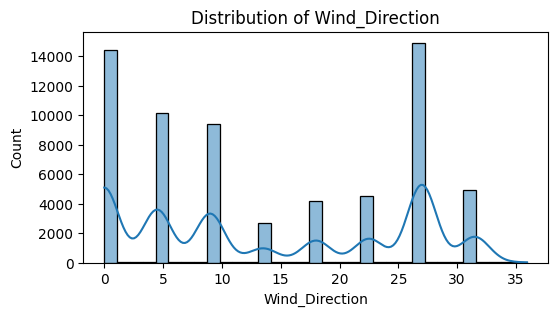

After Pettit
                     count        mean        std    min           25%  \
Barometer - mm Hg  33241.0  758.496453   2.462459  744.9  7.569000e+02   
Hum - %            33241.0   75.302594  11.728150   24.0  6.800000e+01   
Wind Speed - m/s   33241.0    2.274008   1.353090    0.0  1.300000e+00   
Rain - mm          33241.0    0.063102   0.842962    0.0  0.000000e+00   
Heat Index - °C    33241.0   29.226706   5.392237   14.3  2.550000e+01   
Temp - °C          33241.0   26.491915   3.491800   14.6  2.420000e+01   
Season             33241.0    1.437351   1.167369    0.0  0.000000e+00   
Day_Night          33241.0    0.548209   0.497678    0.0  0.000000e+00   
Wind_Dir_sin       33241.0    0.306713   0.555293   -1.0  0.000000e+00   
Wind_Dir_cos       33241.0    0.341166   0.685180   -1.0  6.123234e-17   
Wind_Direction     33241.0   12.609056  11.106372    0.0  0.000000e+00   

                          50%         75%         max       skew         kurt  
Barometer - mm Hg 

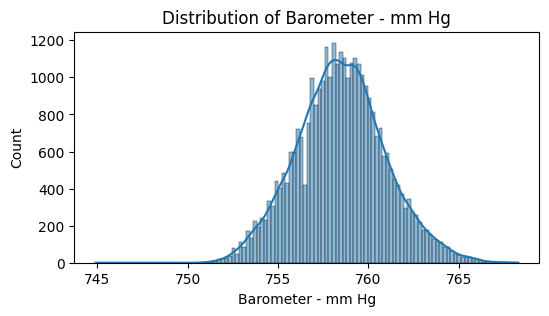

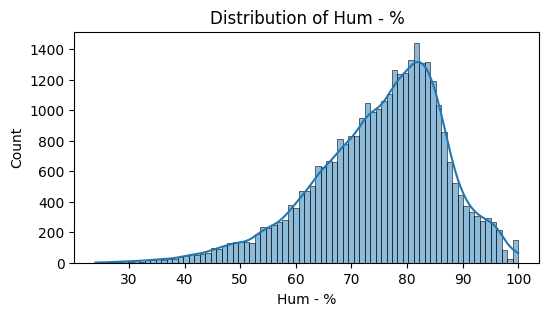

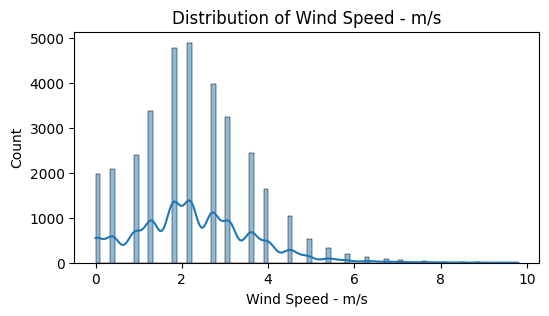

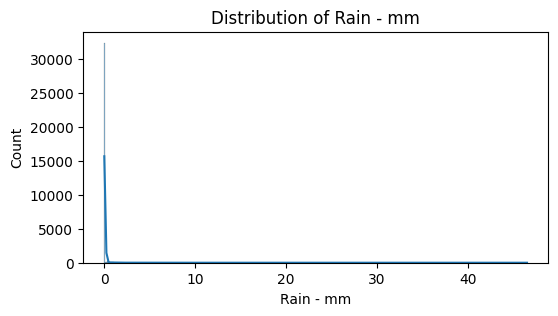

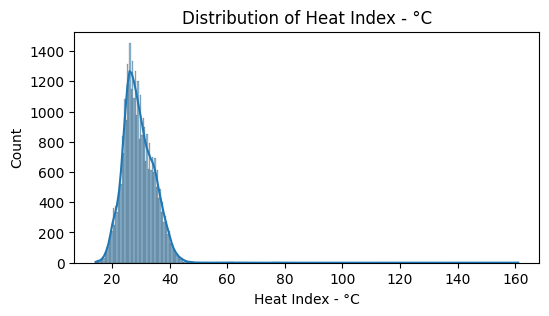

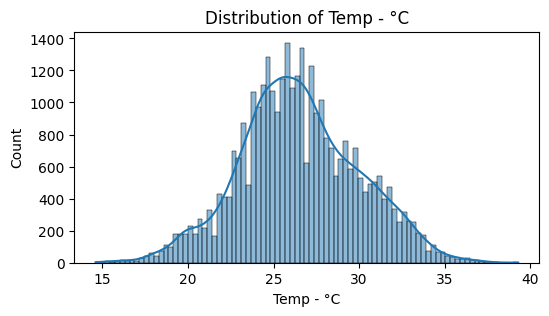

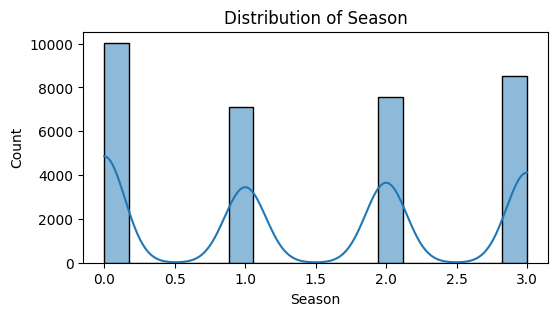

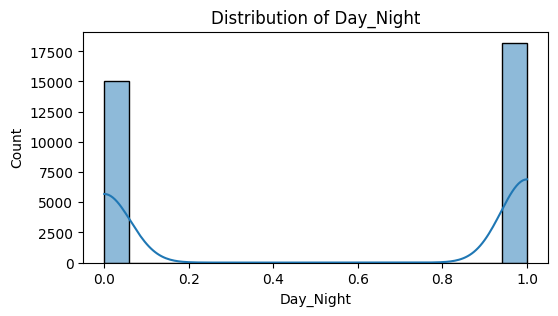

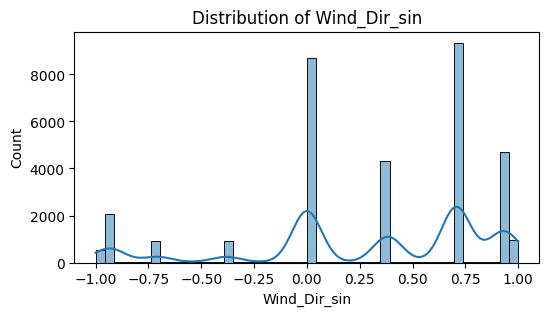

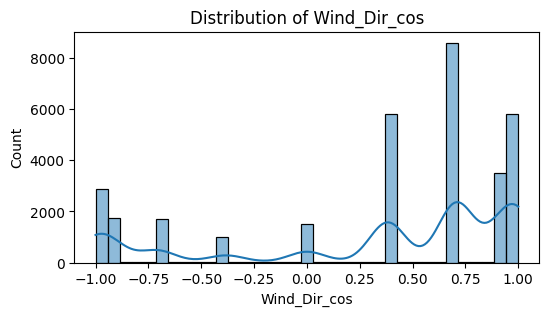

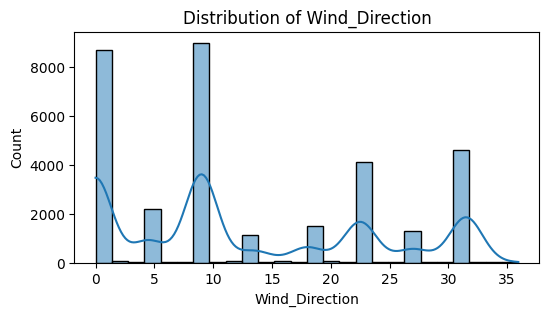

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Inspect distributions
def inspect_columns(df):
    desc = df.describe().T
    # Calculate skewness and kurtosis separately
    desc['skew'] = df.skew()
    desc['kurt'] = df.kurtosis()
    print(desc[['mean', 'std', 'min', 'max', 'skew', 'kurt']])
    for col in df.columns:
        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# Calculate skew and kurtosis
def add_skew_kurt(df):
    df_stats = df.describe().T
    df_stats['skew'] = df.skew()
    df_stats['kurt'] = df.kurtosis()
    return df_stats

print("Before Pettit")
print(add_skew_kurt(df_model_before_Pettit))
inspect_columns(df_model_before_Pettit)

print("After Pettit")
print(add_skew_kurt(df_model_after_Pettit))
inspect_columns(df_model_after_Pettit)

### Barometer - mm Hg: Handling Invalid Zero Values

This cell checks for zero values in the "Barometer - mm Hg" column.  
Since a zero reading is not physically plausible for barometric pressure, these values are considered invalid.  
We replace 0s with NaN and then impute them using the median of the column.

In [134]:
barometer_col = 'Barometer - mm Hg'
for df in [df_model_before_Pettit, df_model_after_Pettit]:
    zero_mask = df[barometer_col] == 0
    print(f"Zero values found: {zero_mask.sum()} in {df.shape[0]} rows")
    # If 0 is not valid, replace with NaN and impute
    df.loc[zero_mask, barometer_col] = np.nan
    df[barometer_col].fillna(df[barometer_col].median(), inplace=True)

Zero values found: 0 in 65911 rows
Zero values found: 0 in 33241 rows


C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\722864717.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[barometer_col].fillna(df[barometer_col].median(), inplace=True)
C:\Users\salsa\AppData\Local\Temp\ipykernel_18476\722864717.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

### Rain - mm: Log Transformation

This cell applies a log transformation (`np.log1p`) to the "Rain - mm" column in both dataframes (`df_model_before_Pettit` and `df_model_after_Pettit`).  
The log transformation helps reduce extreme right skewness and the impact of outliers, making the feature more suitable for modeling.

In [135]:
skewed_cols = ['Rain - mm']
for col in skewed_cols:
    df_model_before_Pettit[col] = np.log1p(df_model_before_Pettit[col])
    df_model_after_Pettit[col] = np.log1p(df_model_after_Pettit[col])

### Heat Index - °C: Log Transformation (After Pettit)

This cell applies a log transformation (`np.log1p`) to the "Heat Index - °C" column in the "After Pettit" dataframe.  
This is optional and targets moderate skewness in this feature, which can help improve model performance.

In [136]:
df_model_after_Pettit['Heat Index - °C'] = np.log1p(df_model_after_Pettit['Heat Index - °C'])

In [137]:
df_model_before_Pettit.to_csv("df_model_before_Pettit.csv", index=False)
df_model_after_Pettit.to_csv("df_model_after_Pettit.csv", index=False)

### Train-Test Split

In [138]:
from sklearn.model_selection import train_test_split

X_before = df_model_before_Pettit.drop('Temp - °C', axis=1)
y_before = df_model_before_Pettit['Temp - °C']

X_after = df_model_after_Pettit.drop('Temp - °C', axis=1)
y_after = df_model_after_Pettit['Temp - °C']

X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X_before, y_before, test_size=0.2, random_state=42
)

X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_after, y_after, test_size=0.2, random_state=42
)

### Models to Try before and after Pettit test 
- **Polynomial Regression** → Establish a simple baseline.
- **Random Forest / XGBoost** → Capture non-linear relationships and interactions.
- **Support Vector Machine (SVM)** → Handle complex decision boundaries.
- **Artificial Neural Network (LSTM)** → Flexible model for deeper non-linear patterns.

---

### Evaluation Strategy
- **Cross-Validation**: Apply *k-fold CV* for robust performance estimation.  
- **Metrics**:  
  - RMSE (Root Mean Squared Error) → Penalizes large errors.  
  - R² (Coefficient of Determination) → Variance explained by the model.  
  - MAE (Mean Absolute Error) → Average error magnitude.  

